# Imports 

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from phenoseeker import BioproxyEvaluator
import pandas as pd




In [2]:
screens_folders = {
      #  "ChemBL": Path("/projects/synsight/repos/phenospace/bioproxy/screens_data_chembl"),
        "Curie": Path("/projects/synsight/repos/phenospace/bioproxy/screens_data_curie"),
        "ChEMBL": Path("/projects/synsight/repos/phenoseeker/data/ChEMBL/assays_csv"),
        "Lit-PCBA": Path("/projects/synsight/repos/phenoseeker/data/Lit_PCBA/csv_files"),
}

In [3]:
model = "openphenom"
base_path = Path("/projects/synsight/data/jump_embeddings/compounds_embeddings/")
npy_file = base_path / model / "Embeddings_norm.npy"
parquet_metadata = base_path / model / Path("metadata.parquet")

In [4]:
eval = BioproxyEvaluator(parquet_metadata, npy_file, screens_folders, embeddings_name=f'Embeddings_{model}', embeddings_entity='compound')

In [5]:
eval

BioproxyEvaluator with 3 sources (Curie: 16 screens, ChEMBL: 49 screens, Lit-PCBA: 5 screens)

In [ ]:
model = "dinov2_g"
npy_file = base_path / model / "Embeddings_norm.npy"
parquet_metadata = base_path / model / Path("metadata.parquet")
eval.load(embedding_name=f'Embeddings_{model}', embeddings_file=npy_file, metadata_file=parquet_metadata)

In [ ]:
model = "resnet50"
npy_file = base_path / model / "Embeddings_norm.npy"
parquet_metadata = base_path / model / Path("metadata.parquet")
eval.load(embedding_name=f'Embeddings_{model}', embeddings_file=npy_file, metadata_file=parquet_metadata)

In [ ]:
model = "chada"
npy_file = base_path / model / "Embeddings_norm.npy"
parquet_metadata = base_path / model / Path("metadata.parquet")
eval.load(embedding_name=f'Embeddings_{model}', embeddings_file=npy_file, metadata_file=parquet_metadata)

In [ ]:
chembl_results_of = eval.compute_enrichment_factors(source='ChEMBL', embeddings_name='Embeddings_openphenom', thresholds=[1, 3, 5, 10])
chembl_results_dino = eval.compute_enrichment_factors(source='ChEMBL', embeddings_name='Embeddings_dinov2_g', thresholds=[1, 3, 5, 10])
chembl_results_resnet50 = eval.compute_enrichment_factors(source='ChEMBL', embeddings_name='Embeddings_resnet50', thresholds=[1, 3, 5, 10])
chembl_results_chada = eval.compute_enrichment_factors(source='ChEMBL', embeddings_name='Embeddings_chada', thresholds=[1, 3, 5, 10])


In [ ]:
lit_pcba_results_of = eval.compute_enrichment_factors(source='Lit-PCBA', embeddings_name='Embeddings_openphenom', thresholds=[1, 3, 5, 10])
lit_pcba_results_dino = eval.compute_enrichment_factors(source='Lit-PCBA', embeddings_name='Embeddings_dinov2_g', thresholds=[1, 3, 5, 10])
lit_pcba_results_resnet50 = eval.compute_enrichment_factors(source='Lit-PCBA', embeddings_name='Embeddings_resnet50', thresholds=[1, 3, 5, 10])
lit_pcba_results_chada = eval.compute_enrichment_factors(source='Lit-PCBA', embeddings_name='Embeddings_chada', thresholds=[1, 3, 5, 10])


In [ ]:
curie_results_of = eval.compute_enrichment_factors(source='Curie', embeddings_name='Embeddings_openphenom', thresholds=[1, 3, 5, 10])
curie_results_dino = eval.compute_enrichment_factors(source='Curie', embeddings_name='Embeddings_dinov2_g', thresholds=[1, 3, 5, 10])
curie_results_resnet50 = eval.compute_enrichment_factors(source='Curie', embeddings_name='Embeddings_resnet50', thresholds=[1, 3, 5, 10])
curie_results_chada = eval.compute_enrichment_factors(source='Curie', embeddings_name='Embeddings_chada', thresholds=[1, 3, 5, 10])

# Plot one model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df = curie_results_dino[curie_results_dino[("N Hits", "mean")] > 3]


# Récupérer les valeurs uniques de Threshold et les trier si besoin
unique_thresholds = sorted(df[("Threshold",)].unique())

for thr in unique_thresholds:
    # Filtrer les données correspondant au threshold courant
    df_thr = df[df[("Threshold",)] == thr]
    
    # Trier les screens par ordre croissant de Hit Rate Random (mean)
    df_thr_sorted = df_thr.sort_values(by=( "Hit Rate Random", "mean"))
    
    # Récupérer la liste des screens triés
    screens = df_thr_sorted[("Screen",)].tolist()
    x = np.arange(len(screens))
    width = 0.25  # largeur des barres

    # Extraire et multiplier par 100 pour avoir des pourcentages
    hit_rate_rand = df_thr_sorted[("Hit Rate Random", "mean")].values * 100
    hit_rate_sel_mean = df_thr_sorted[("Hit Rate Selected", "mean")].values * 100
    hit_rate_sel_max = df_thr_sorted[("Hit Rate Selected", "max")].values * 100
    
    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Affichage des barres dans l'ordre : Random, Selected (mean), Selected (max)
    ax.bar(x - width, hit_rate_rand, width, label='Hit Rate Random (%)')
    ax.bar(x, hit_rate_sel_mean, width, label='Hit Rate Selected (mean) (%)')
    ax.bar(x + width, hit_rate_sel_max, width, label='Hit Rate Selected (max) (%)')
    
    # Personnalisation du graphique
    ax.set_xlabel("Screen")
    ax.set_ylabel("Hit Rate (%)")
    ax.set_title(f"Hit Rates pour Threshold = {thr}")
    ax.set_xticks(x)
    ax.set_xticklabels(screens, rotation=45)
    ax.legend()
    ax.grid(True)  # Ajout de la grille
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que votre DataFrame s'appelle df

# Récupérer les valeurs uniques de Threshold et les trier si besoin
unique_thresholds = sorted(df[("Threshold",)].unique())

for thr in unique_thresholds:
    # Filtrer les données correspondant au threshold courant
    df_thr = df[df[("Threshold",)] == thr]
    
    # Trier les screens par ordre croissant de EF (mean)
    df_thr_sorted = df_thr.sort_values(by=( "Hit Rate Random", "mean"))
    
    # Récupérer la liste des screens triés
    screens = df_thr_sorted[("Screen",)].tolist()
    x = np.arange(len(screens))
    width = 0.35  # largeur des barres
    
    # Extraire les valeurs d'EF
    ef_mean = df_thr_sorted[("EF", "mean")].values
    ef_max = df_thr_sorted[("EF", "max")].values
    
    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Affichage des barres pour EF (mean) et EF (max)
    ax.bar(x - width/2, ef_mean, width, label='EF (mean)')
    ax.bar(x + width/2, ef_max, width, label='EF (max)')
    
    # Ajout d'une ligne horizontale rouge en pointillé pour EF = 1
    ax.axhline(y=1, color='red', linestyle='--', label='EF = 1')
    
    # Personnalisation du graphique
    ax.set_xlabel("Screen")
    ax.set_ylabel("Enrichment Factor")
    ax.set_title(f"Enrichment Factor pour Threshold = {thr}")
    ax.set_xticks(x)
    ax.set_xticklabels(screens, rotation=45)
    ax.legend()
    ax.grid(True)  # Ajout de la grille
    plt.tight_layout()
    plt.show()


# Plot all models

In [ ]:
models = {
    "DINOv2": curie_results_dino,
    "OpenPhenom": curie_results_of,
    "Resnet50": curie_results_resnet50,
    "ChAda": curie_results_chada,
}


# Use one model as a reference for the random hit rate values.
ref_df = models["ChAda"]
ref_df = ref_df[ref_df[("N Hits", "mean")] > 3]


In [ ]:
unique_thr = sorted(ref_df[("Threshold",)].unique())
measures = ["mean", "median", "max"]

for thr in unique_thr:
    # Build a dict with data indexed by Screen for each model
    common_screens = None
    model_data = {}
    for name, df in models.items():
        df_thr = df[df[("Threshold",)] == thr].copy()
        df_thr = df_thr.set_index(("Screen",))
        model_data[name] = df_thr
        screens = set(df_thr.index)
        if common_screens is None:
            common_screens = screens
        else:
            common_screens &= screens
    common_screens = sorted(common_screens)

    # Count best screens per measure.
    # In case of tie, both models get the point.
    best_counts = {m: {name: 0 for name in models} for m in measures}
    for screen in common_screens:
        for m in measures:
            best_val = max(
                df_thr.loc[screen][("Hit Rate Selected", m)]
                for df_thr in model_data.values()
            )
            for name, df_thr in model_data.items():
                val = df_thr.loc[screen][("Hit Rate Selected", m)]
                if val == best_val:
                    best_counts[m][name] += 1

    # Create a grouped bar plot using counts
    x = np.arange(len(measures))
    bar_width = 0.2
    fig, ax = plt.subplots(figsize=(8, 6))
    for i, name in enumerate(models):
        counts = [best_counts[m][name] for m in measures]
        ax.bar(x + i * bar_width, counts, bar_width, label=name)
    ax.set_xticks(x + (len(models) - 1) * bar_width / 2)
    ax.set_xticklabels(measures)
    ax.set_ylabel("Number of Screens")
    ax.set_title(f"Best Model Count at Threshold {thr}")
    ax.legend()
    plt.tight_layout()
    plt.show()

In [ ]:


for thr in unique_thr:
    # Build a dict with data indexed by Screen for each model.
    common_screens = None
    model_data = {}
    for name, df in models.items():
        df_thr = df[df[("Threshold",)] == thr].copy()
        df_thr = df_thr.set_index(("Screen",))
        model_data[name] = df_thr
        screens = set(df_thr.index)
        if common_screens is None:
            common_screens = screens
        else:
            common_screens &= screens
    common_screens = sorted(common_screens)

    # Count unique wins and tie wins per measure.
    best_counts = {m: {name: {"unique": 0, "tie": 0} 
                 for name in models} for m in measures}
    for screen in common_screens:
        for m in measures:
            best_val = max(
                df_thr.loc[screen][("Hit Rate Selected", m)]
                for df_thr in model_data.values()
            )
            winners = []
            for name, df_thr in model_data.items():
                val = df_thr.loc[screen][("Hit Rate Selected", m)]
                if val == best_val:
                    winners.append(name)
            if len(winners) == 1:
                best_counts[m][winners[0]]["unique"] += 1
            elif len(winners) > 1:
                for name in winners:
                    best_counts[m][name]["tie"] += 1

    # Create a stacked bar plot.
    x = np.arange(len(measures))
    n_mod = len(models)
    bar_width = 0.2
    fig, ax = plt.subplots(figsize=(10, 6))
    for i, name in enumerate(models):
        unique_vals = [best_counts[m][name]["unique"] 
                       for m in measures]
        tie_vals = [best_counts[m][name]["tie"] 
                    for m in measures]
        pos = x + i * bar_width
        ax.bar(pos, unique_vals, bar_width, label=f"{name} unique")
        ax.bar(pos, tie_vals, bar_width, bottom=unique_vals,
               label=f"{name} tie", hatch='//', alpha=0.7)
    ax.set_xticks(x + (n_mod - 1) * bar_width / 2)
    ax.set_xticklabels(measures)
    ax.set_ylabel("Number of Screens")
    ax.set_title(f"Best Model Counts at Threshold {thr}")
    ax.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Récupérer les seuils uniques triés à partir du DataFrame de référence.
unique_thr = sorted(ref_df[("Threshold",)].unique())

for thr in unique_thr:
    # Filtrer le DataFrame de référence pour le seuil courant
    df_ref_thr = ref_df[ref_df[("Threshold",)] == thr].copy()
    
    # On trie ici selon la colonne 'mean' de "Hit Rate Random"
    df_ref_thr.sort_values(by=("Hit Rate Random", "mean"), inplace=True)
    
    # Récupération de l'ordre des écrans
    screens = df_ref_thr[("Screen",)].tolist()
    x = np.arange(len(screens))  # positions de base (indices)
    
    # Création d'une figure avec 3 sous-graphiques côte à côte
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    # On veut trois graphiques : mean, median, max
    for idx, measure in enumerate(["mean", "median", "max"]):
        ax = axes[idx]
        
        # Nombre total de « groupes » de barres = nombre de modèles + 1 (pour le random)
        n_total = len(models) + 1
        
        # Largeur de chaque barre : on fixe la largeur totale du « groupe » à 0.8
        bar_width = 0.8 / n_total
        
        # Offsets pour centrer le « groupe » de barres sur chaque x
        offsets = np.arange(n_total) * bar_width - (0.8 / 2) + (bar_width / 2)
        
        # 1) Tracer la barre "random"
        #    (si la colonne correspondante existe, par sécurité)
        if ("Hit Rate Random", measure) in df_ref_thr.columns:
            hit_rand = df_ref_thr[("Hit Rate Random", measure)].values * 100
            pos_rand = x + offsets[0]
            ax.bar(pos_rand, hit_rand, bar_width,
                   label=f"Hit Rate Random ({measure}) (%)")
        
        # 2) Tracer les barres pour chaque modèle
        for i, (name, df_mod) in enumerate(models.items(), start=1):
            df_mod_thr = df_mod[df_mod[("Threshold",)] == thr].copy()
            
            # On s'assure que l'ordre des écrans correspond à celui du DF de référence
            df_mod_thr = df_mod_thr.set_index(("Screen",))
            df_mod_thr = df_mod_thr.loc[screens].reset_index()
            
            if ("Hit Rate Selected", measure) in df_mod_thr.columns:
                hit_sel = df_mod_thr[("Hit Rate Selected", measure)].values * 100
                pos_mod = x + offsets[i]
                ax.bar(pos_mod, hit_sel, bar_width,
                       label=f"{name} Selected ({measure}) (%)")
        
        ax.set_xlabel("Screen")
        ax.set_ylabel("Hit Rate (%)")
        ax.set_title(f"Hit Rates for Threshold = {thr} - {measure.capitalize()}")
        ax.set_xticks(x)
        ax.set_xticklabels(screens, rotation=45)
        ax.grid(True)
        
        # Pour éviter la répétition des labels dans la légende,
        # on peut afficher la légende uniquement sur le dernier subplot
        # ou bien la laisser sur chaque subplot, à votre convenance.
        ax.legend()
    
    plt.tight_layout()
    plt.show()


# One Screen

In [ ]:
df = chembl_results_resnet50

In [ ]:
df[(df['Threshold'] ==5) & (df[('Normalized_EF', 'max')] == 100)].sort_values(by=('Hit Rate Random', 'mean'), ascending=True)

In [ ]:
df[df['Screen']=='CHEMBL3214967_val']

In [ ]:
df_test = eval.screen_embedding_managers['ChEMBL']['CHEMBL3214967_val'].df

In [ ]:
df_test.columns

In [ ]:
df_test[df_test['Metadata_Bioactivity'] == "hit"]['Metadata_JCP2022'].tolist()

In [ ]:
df_dino = pd.DataFrame(eval.compute_ranking(source="ChEMBL", screen="CHEMBL3214967_val", embeddings_name="Embeddings_resnet50", JCP2022_id="JCP2022_115742", plot=True))

In [ ]:
df_dino = pd.DataFrame(eval.compute_ranking(source="ChEMBL", screen="CHEMBL3214967_val", embeddings_name="Embeddings_dinov2_g", JCP2022_id="JCP2022_115742", plot=True))

In [ ]:
plt.hist(eval.screen_embedding_managers['ChEMBL']['CHEMBL3214967_val'].distance_matrices["cosine_distance_matrix_Embeddings_openphenom"].flatten(), bins=100, log=True)
plt.grid()
plt.show()

In [ ]:
plt.hist(eval.screen_embedding_managers['ChEMBL']['CHEMBL3214967_val'].distance_matrices["cosine_distance_matrix_Embeddings_chada"].flatten(), bins=100, log=True)
plt.grid()
plt.show()

In [ ]:
plt.hist(eval.screen_embedding_managers['ChEMBL']['CHEMBL3214967_val'].distance_matrices['cosine_distance_matrix_Embeddings_dinov2_g'].flatten(), bins=100, log=True)
plt.grid()
plt.show()

In [ ]:
plt.hist(eval.screen_embedding_managers['ChEMBL']['CHEMBL3214967_val'].distance_matrices["cosine_distance_matrix_Embeddings_resnet50"].flatten(), bins=100, log=True)
plt.grid()

plt.show()

In [ ]:
df_dino.head(15)

In [ ]:
df.head(15)

In [ ]:
eval.compute_enrichment_factor_for_screen(source="ChEMBL", screen="CHEMBL3214967_val", embeddings_name="Embeddings_resnet50", thresholds=[5])

# Clean figures

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named df and already defined
threshold_value = 5  # Change as needed



In [ ]:
df = chembl_results_dino

In [ ]:
chembl_results_dino

In [ ]:
def plot_EF(df, source,figsize=(10, 5), screen_names=False):

    for thr in unique_thresholds:
        # Filtrer les données correspondant au threshold courant
        df_thr = df[df[("Threshold",)] == thr]
        
        # Trier les screens par ordre croissant de EF (mean)
        df_thr_sorted = df_thr.sort_values(by=( "Hit Rate Random", "mean"))
        
        # Récupérer la liste des screens triés
        screens = df_thr_sorted[("Screen",)].tolist()
        x = np.arange(len(screens))
        width = 0.35  # largeur des barres
        
        # Extraire les valeurs d'EF
        ef_mean = df_thr_sorted[("EF", "mean")].values
        ef_max = df_thr_sorted[("EF", "max")].values
        # Création du graphique
        fig, ax = plt.subplots(figsize=figsize)
        
        # Affichage des barres pour EF (mean) et EF (max)
        ax.bar(x - width/3, ef_mean, width, label='EF (mean)')
        ax.bar(x + width/3, ef_max, width, label='EF (max)')
        
        # Ajout d'une ligne horizontale rouge en pointillé pour EF = 1
        ax.axhline(y=1, color='red', linestyle='--', label='EF = 1')
        
        # Personnalisation du graphique
        ax.set_xlabel("Screens")
        ax.set_ylabel("Enrichment Factor")
        ax.set_title(f"Enrichment Factor @{thr}% for {source}")
        ax.set_xticks(x)
        if screen_names:
            ax.set_xticklabels(screens, rotation=45)
        else:
            ax.set_xticklabels("", rotation=45)
        ax.legend()
        ax.grid(True)  # Ajout de la grille
        plt.tight_layout()
        plt.show()


In [ ]:
def plot_result_model(df, threshold_value=5, figsize=(20, 10), plot_names=False):
    import numpy as np
    import matplotlib.pyplot as plt

    # Filter the dataframe
    df = df[df[("N Hits", "mean")] > 3]
    df_threshold = df[df[('Threshold', '')] == threshold_value].copy()
    df_threshold.sort_values(('Hit Rate Random', 'mean'), inplace=True)

    x = np.arange(len(df_threshold))
    width = 0.25

    # Extract values
    baseline = df_threshold[('Hit Rate Random', 'mean')] * 100
    mean_enrichment = df_threshold[('Normalized_EF', 'mean')]
    max_enrichment = df_threshold[('Normalized_EF', 'max')]

    # Colors in order: Purple, Green, Blue
    colors = {
        'baseline': 'purple',
        'mean': 'green',
        'max': 'blue'
    }

    _, ax = plt.subplots(figsize=figsize)

    # Plot grouped bars
    ax.bar(x - width, baseline, width, color=colors['baseline'],
           label='Baseline: Original Selection of Compounds')
    ax.bar(x, mean_enrichment, width, color=colors['mean'],
           label='Mean Enrichment Achieved by Our Method')
    ax.bar(x + width, max_enrichment, width, color=colors['max'],
           label='Maximum Enrichment Achieved by Our Method')

    # Adapt x-axis tick labels based on the plot_names flag
    ax.set_xticks(x)
    if plot_names:
        # Align labels to the right without rotation
        ax.set_xticklabels(df_threshold[('Screen', '')], rotation=0, ha='right')
    else:
        ax.set_xticklabels("", ha='right')

    # Remove axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Place the legend outside the plot area
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    # Add grid for better readability
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Increase the font size of both x and y axis tick labels
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

    plt.tight_layout()
    plt.show()


In [ ]:
chembl_results_chada

In [ ]:
def plot_result_model(df, threshold_value=5, figsize=(20, 10), plot_names=False):
    import numpy as np
    import matplotlib.pyplot as plt

    # Filter the dataframe
    df = df[df[("N Hits", "mean")] > 3]
    df_threshold = df[df[('Threshold', '')] == threshold_value].copy()
    df_threshold.sort_values(('Hit Rate Random', 'mean'), inplace=True)

    x = np.arange(len(df_threshold))
    width = 0.25

    # Extract values
    baseline = df_threshold[('Hit Rate Random', 'mean')] * 100
    mean_enrichment = df_threshold[('Normalized_EF', 'mean')]
    max_enrichment = df_threshold[('Normalized_EF', 'max')]

    # Colors in order: Purple, Green, Blue
    colors = {
        'baseline': 'purple',
        'mean': 'green',
        'max': 'blue'
    }

    _, ax = plt.subplots(figsize=figsize)

    # Plot grouped bars
    ax.bar(x - width, baseline, width, color=colors['baseline'],
           label='Baseline: Original Selection of Compounds')
    ax.bar(x, mean_enrichment, width, color=colors['mean'],
           label='Mean Enrichment Achieved by Our Method')
    ax.bar(x + width, max_enrichment, width, color=colors['max'],
           label='Maximum Enrichment Achieved by Our Method')

    # Adapt x-axis tick labels based on the plot_names flag
    ax.set_xticks(x)
    if plot_names:
        # Align labels to the right without rotation
        ax.set_xticklabels(df_threshold[('Screen', '')], rotation=0, ha='right')
    else:
        ax.set_xticklabels("", ha='right')

    # Remove axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')


    # Add grid for better readability
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Increase the font size of both x and y axis tick labels
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

    plt.tight_layout()
    plt.show()

In [ ]:
threshold_value = 1

plot_result_model(chembl_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(curie_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(lit_pcba_results_dino, plot_names=True, figsize=(20, 9), threshold_value=threshold_value)

In [ ]:
threshold_value = 3

plot_result_model(chembl_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(curie_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(lit_pcba_results_dino, plot_names=True, figsize=(20, 9), threshold_value=threshold_value)

In [ ]:
threshold_value = 5

plot_result_model(chembl_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(curie_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(lit_pcba_results_dino, plot_names=True, figsize=(20, 9), threshold_value=threshold_value)

In [ ]:
threshold_value = 10

plot_result_model(chembl_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(curie_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(lit_pcba_results_dino, plot_names=True, figsize=(20, 9), threshold_value=threshold_value)

In [ ]:
plot_EF(chembl_results_dino, "ChEMBL screens")

In [ ]:
plot_EF(curie_results_dino, "Curie screens")

In [ ]:

lit_pcba_results_dino[lit_pcba_results_dino['Threshold']==5]

In [ ]:
plot_EF(lit_pcba_results_dino, "Lit-PCBA Targets", (5,5), True)

# % of Jump

In [13]:

eval.screen_embedding_managers['Curie'].items()

dict_items([('E020_all-val', Embedding Manager with 206 compounds embeddings), ('E026_all-val', Embedding Manager with 292 compounds embeddings), ('E032_all-val', Embedding Manager with 292 compounds embeddings), ('E033_2D_all-val', Embedding Manager with 336 compounds embeddings), ('E033_3D_all-val', Embedding Manager with 336 compounds embeddings), ('e045_PS_24h_all-val', Embedding Manager with 351 compounds embeddings), ('e045_PS_72h_all-val', Embedding Manager with 309 compounds embeddings), ('E064_MDB4_all-val', Embedding Manager with 473 compounds embeddings), ('E069_A673_EpiUbi_D7_all-val', Embedding Manager with 100 compounds embeddings), ('E069_Day_11_EpiUbi_D7_all-val', Embedding Manager with 100 compounds embeddings), ('E069_Day_4_EpiUbi_D7_all-val', Embedding Manager with 100 compounds embeddings), ('E14_PS_doxe_all-val', Embedding Manager with 292 compounds embeddings), ('E15_all-val', Embedding Manager with 225 compounds embeddings), ('I016_ACE2_all-val', Embedding Manage

In [23]:
jcp_curie = []
for key, em in eval.screen_embedding_managers['Curie'].items():
    jcp_curie = jcp_curie + em.df['Metadata_JCP2022'].to_list()
jcp_curie = set(jcp_curie)

In [28]:
jcp_chembl = []
for key, em in eval.screen_embedding_managers['ChEMBL'].items():
    jcp_chembl = jcp_chembl + em.df['Metadata_JCP2022'].to_list()
jcp_chembl = set(jcp_chembl)

In [29]:
jcp_litpcba = []
for key, em in eval.screen_embedding_managers['Lit-PCBA'].items():
    jcp_litpcba = jcp_litpcba + em.df['Metadata_JCP2022'].to_list()
jcp_litpcba = set(jcp_litpcba)

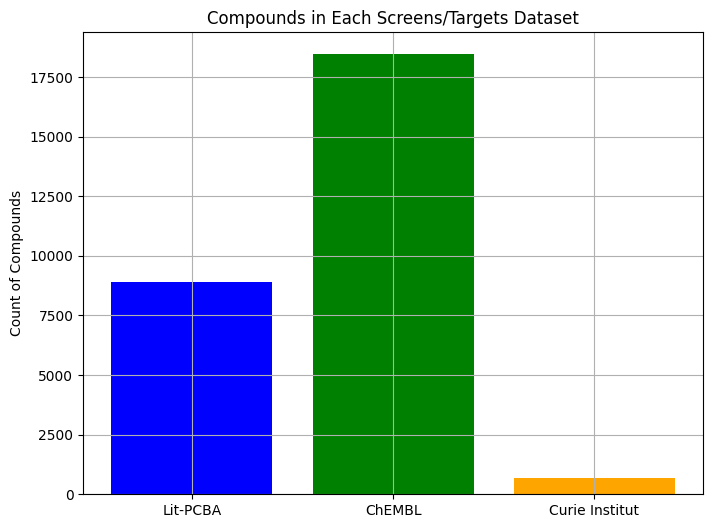

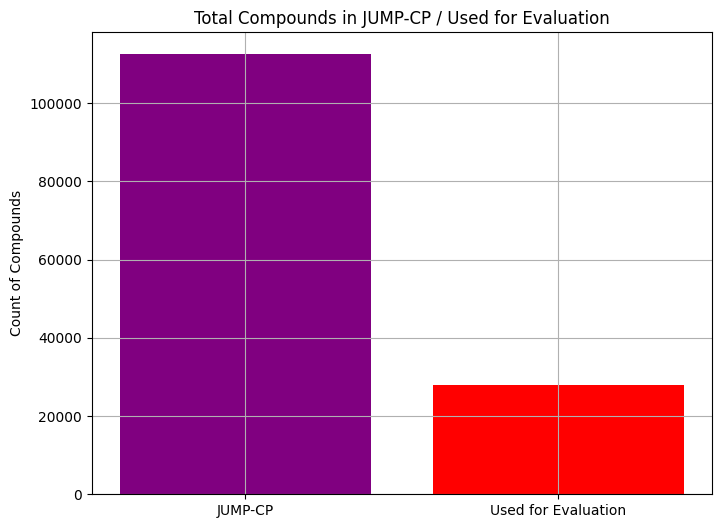

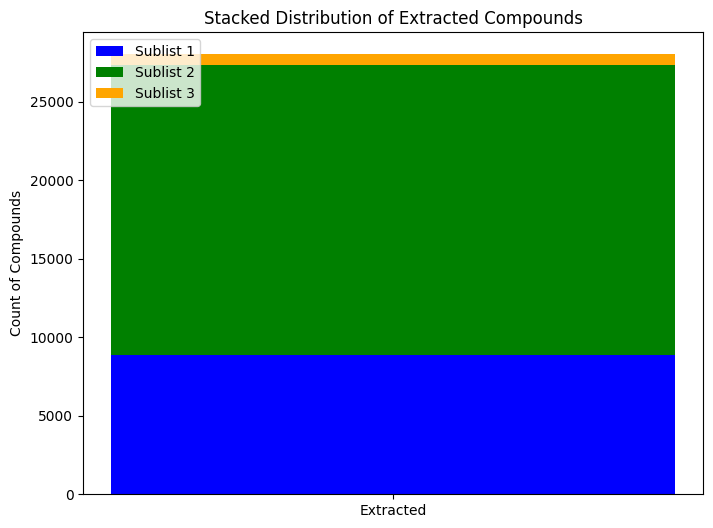

In [33]:
big_list = set(eval.global_embedding_manager.df['Metadata_JCP2022'].to_list())
sublist1 = jcp_litpcba
sublist2 = jcp_chembl
sublist3 = jcp_curie

count_in_big_list_sublist1 = len(sublist1 & big_list)
count_in_big_list_sublist2 = len(sublist2 & big_list)
count_in_big_list_sublist3 = len(sublist3 & big_list)


total_extracted = count_in_big_list_sublist1 + count_in_big_list_sublist2 + count_in_big_list_sublist3


labels = ['Lit-PCBA', 'ChEMBL', 'Curie Institut', 'JUMP-CP']
counts = [count_in_big_list_sublist1, count_in_big_list_sublist2, count_in_big_list_sublist3, total_extracted]


fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(labels[:-1], counts[:-1], color=['blue', 'green', 'orange'])
ax1.set_title('Compounds in Each Screens/Targets Dataset')
ax1.grid()
ax1.set_ylabel('Count of Compounds')
plt.show()


fig, ax2 = plt.subplots(figsize=(8, 6))
ax2.bar(['JUMP-CP', 'Used for Evaluation'], [len(big_list), total_extracted], color=['purple', 'red'])
ax2.grid()
ax2.set_title('Total Compounds in JUMP-CP / Used for Evaluation')
ax2.set_ylabel('Count of Compounds')
plt.show()


fig, ax3 = plt.subplots(figsize=(8, 6))
ax3.bar('Extracted', count_in_big_list_sublist1, color='blue', label='Sublist 1')
ax3.bar('Extracted', count_in_big_list_sublist2, bottom=count_in_big_list_sublist1, color='green', label='Sublist 2')
ax3.bar('Extracted', count_in_big_list_sublist3, bottom=count_in_big_list_sublist1 + count_in_big_list_sublist2, color='orange', label='Sublist 3')
ax3.set_title('Stacked Distribution of Extracted Compounds')
ax3.set_ylabel('Count of Compounds')
ax3.legend(loc='upper left')
plt.show()